## Welcome to CIT(Commodity Investment Tracker) Library 


### 
Commodity Investment Tracker and Index Correlation Analyzer
This project leverages the CIT library to scrape and analyze the historical Spot Prices for Gold and Silver. It provides powerful tools for investors and data enthusiasts to track investments, compare commodities, and understand their relationships with key financial indexes over time. With a focus on usability and functionality, this project includes features such as custom investment tracking, interval-based investment strategies, and correlation analysis with economic indicators.

Features
1. Commodity Price Scraping
Scrapes daily spot prices for Gold and Silver using the CIT library.
Historical price data for both commodities can be filtered by user-defined date ranges.
Save historical commodities prices to excel file if needed.
----------------------------
2. Investment Tracking
Allows users to simulate investments with a defined principal amount.
Track investment growth based on the frequency of investments (e.g., $500 every 30 days).
View the performance of your investment over different time periods.
----------------------------

3. Commodity Comparison
Visualize and compare Gold and Silver spot prices over specified periods.
Identify patterns and trends by comparing these commodities side by side.
----------------------------

4. Correlation Analysis
Compare commodity prices against major economic indexes such as the S&P 500, NASDAQ, or other custom indexes.
Calculate and display positive or negative relationships between Gold, Silver, and selected indexes.
----------------------------

5. Interactive Data Visualization
Generate comprehensive charts and graphs to illustrate commodity price movements.
Visualize correlation strength and investment growth through interactive plots.
----------------------------

Disclaimer

The information provided by the CIT library is for educational purposes only and does not constitute investment advice. We do not accept any liability for any loss or damage whatsoever caused in reliance upon such information or services.
Our data depends on https://www.fxempire.com/commodities and API of https://fred.stlouisfed.org/
TR: UYARI

CIT kütüphanesi tarafından sağlanan bilgiler yalnızca eğitim amaçlıdır ve yatırım tavsiyesi niteliğinde değildir, Bu tür bilgi veya hizmetlere güvenilmesinden kaynaklanan herhangi bir kayıp veya hasara ilişkin herhangi bir sorumluluk kabul etmiyoruz. 
Kütüphanenin çektiği Verilerin doğruluğu https://www.fxempire.com/commodities  sitesine ve https://fred.stlouisfed.org Sitesinin API sistemine bağlıdır

## Let's Import the necesarry functions. 

In [13]:
from CIT import  CommodityInvestmentTracker
from CIT import compare_to_economic_indicators,calculate_monotonic_relationships,visualize_relationships

In [14]:
cit=CommodityInvestmentTracker()

## We use DD-MM-YY Structure for defining the dates.

In [15]:
data_silver= cit.get_commodity_data(start_date="17-07-2017",commodity_type="silver")
data_gold= cit.get_commodity_data(start_date="17-07-2017",commodity_type="gold")
print(data_gold.head(2))
print(data_silver.head(2))

            Gold_USD_Price
Date                      
16-07-2017        1234.046
17-07-2017        1242.414
            Silver_USD_Price
Date                        
16-07-2017          16.11170
17-07-2017          16.29144


### Feature 1 - Compare Normalized Commodities prices (Base price is 100 for better comparasion in graphs)

* You have to define start and end date for comparasion(You can only define the dates you have scraped. ) 

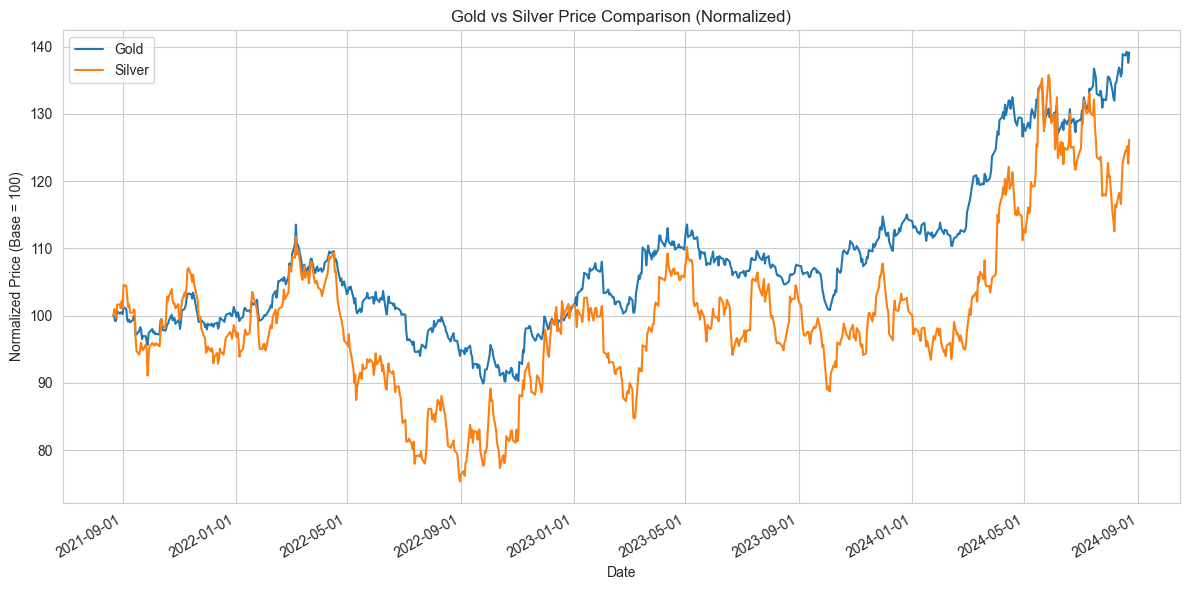

Performance Comparison:
Gold return: 39.16%
Silver return: 26.18%


In [16]:
cit.compare_commodities(start_date="22-08-2021",end_date="22-08-2024")

### Feature 2- Analyze a certain commodity by choosing a starting and end date.
* It's not mandatory to define an end date. If you don't define it will take today as a last day.

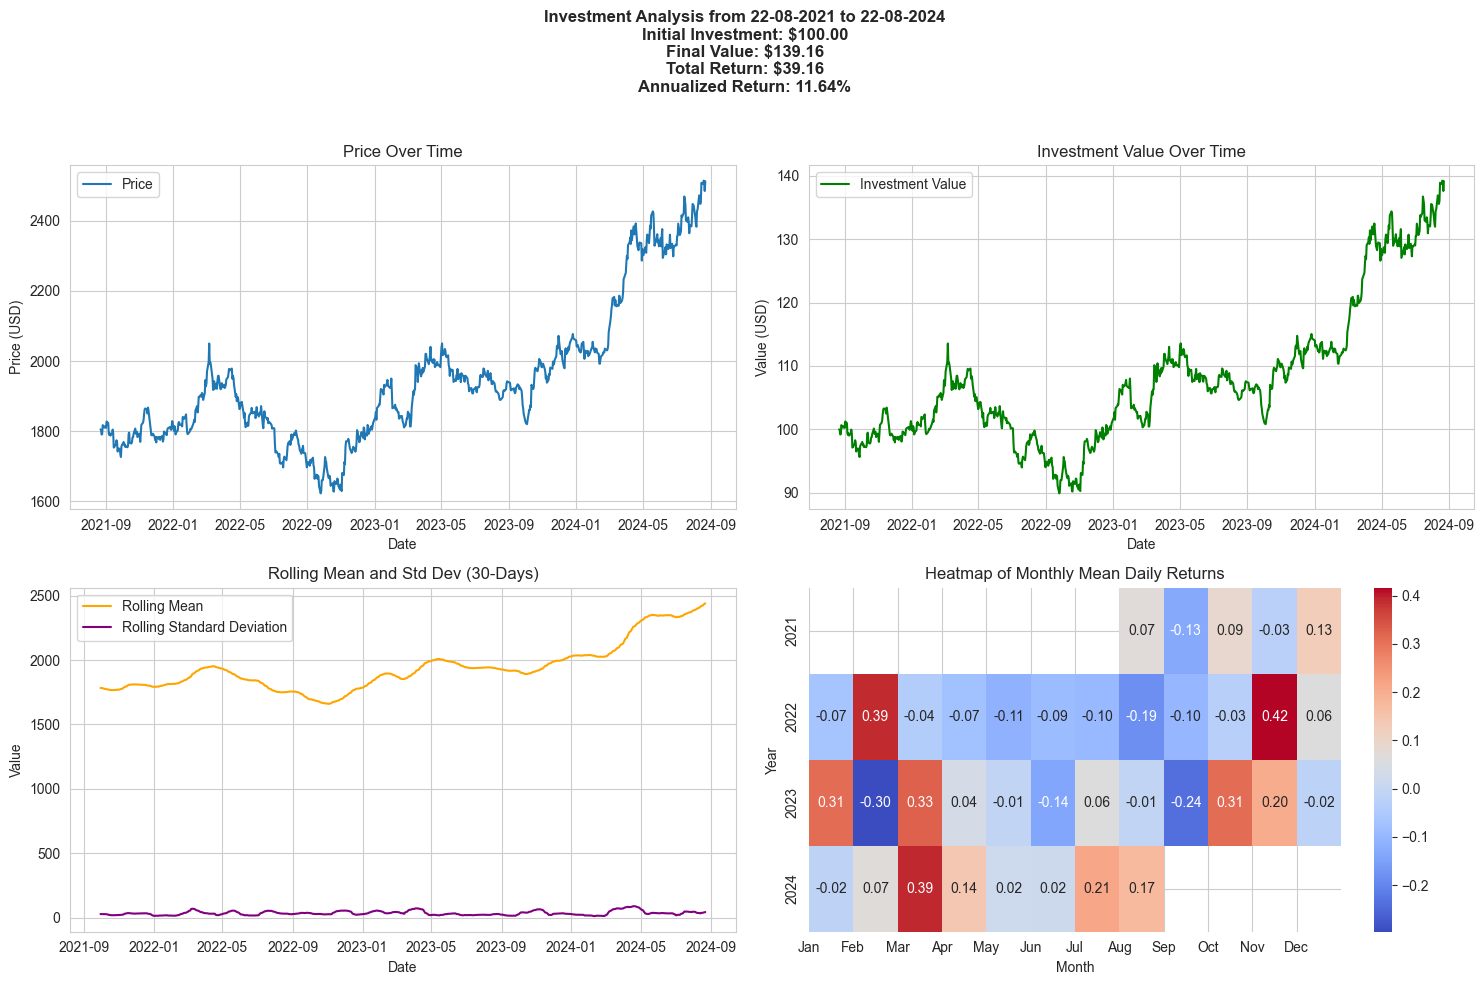

'Analysis Completed'

In [17]:
cit.analyze_investment(data_gold,start_date="22-08-2021",end_date="22-08-2024",initial_investment=100)

### Feature 3- Periodical Investment Analysis.
* With the help of this feature you will be able to track your investment growth.

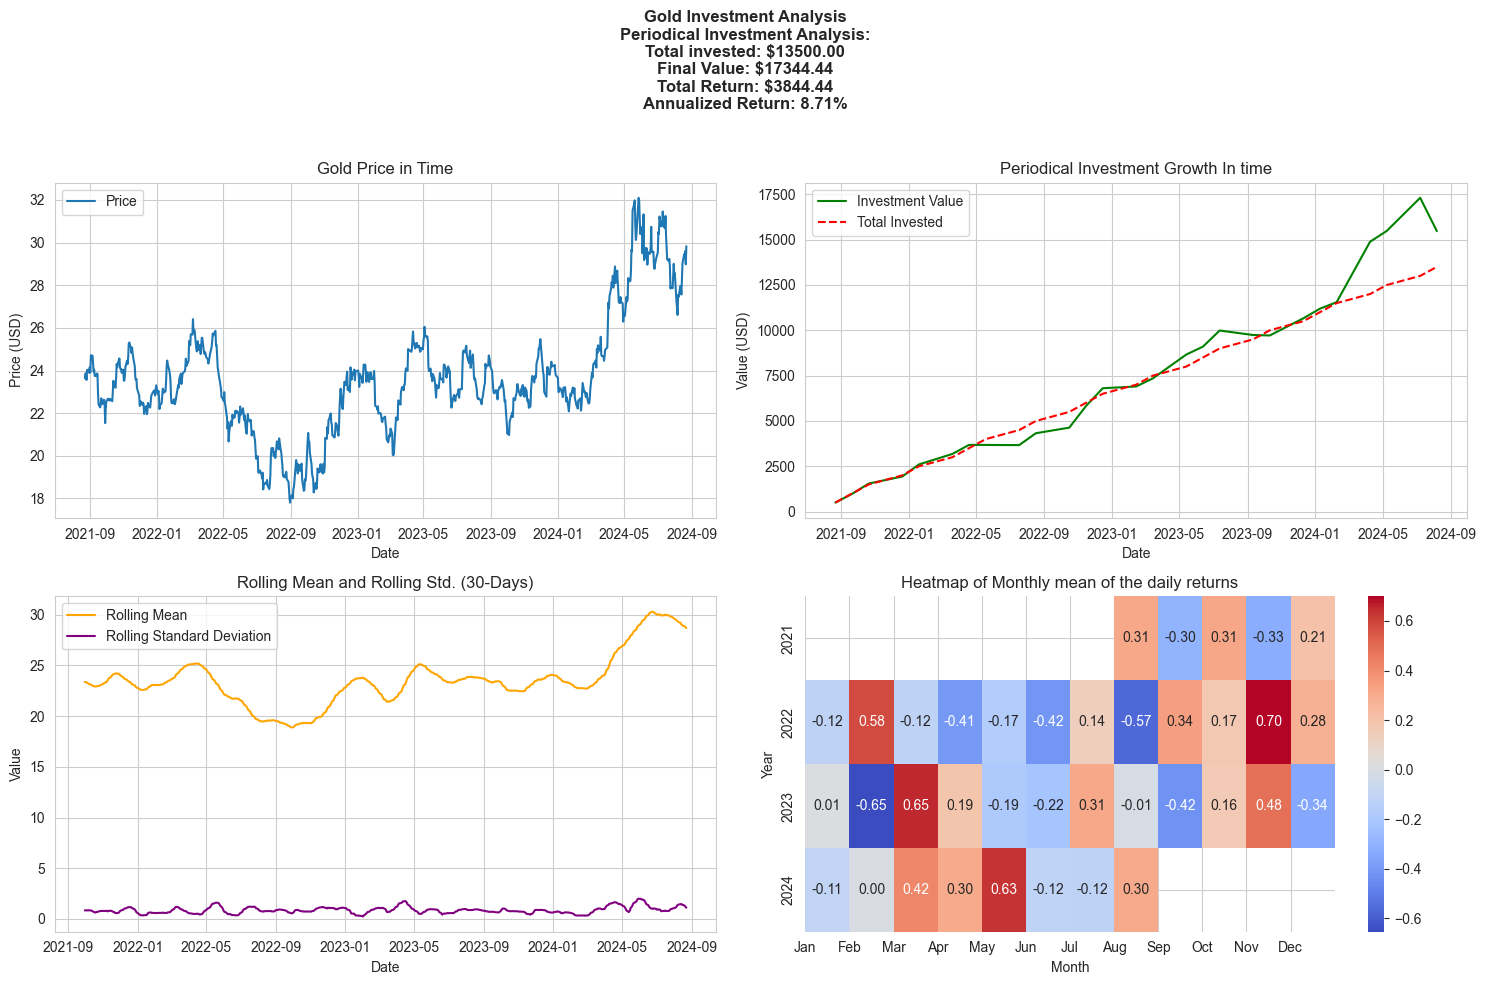

In [18]:
results = cit.analyze_and_plot_periodic_investment(
    df=data_silver,
    start_date="22-08-2021",
    end_date="22-08-2024",
    interval_days=30,
    investment_amount=500,
    commodity_type="Gold"
)

### Feature 4- Save Data to excel Format.

In [19]:
cit.save_to_excel(df=data_gold,file_path="gold_data.xlsx")
cit.save_to_excel(df=data_silver,file_path="silver_data.xlsx")

Data successfully saved to gold_data.xlsx
Data successfully saved to silver_data.xlsx


### Feature 5- Compare the commodity with a desired index. Check for Index codes at : https://fred.stlouisfed.org/ 

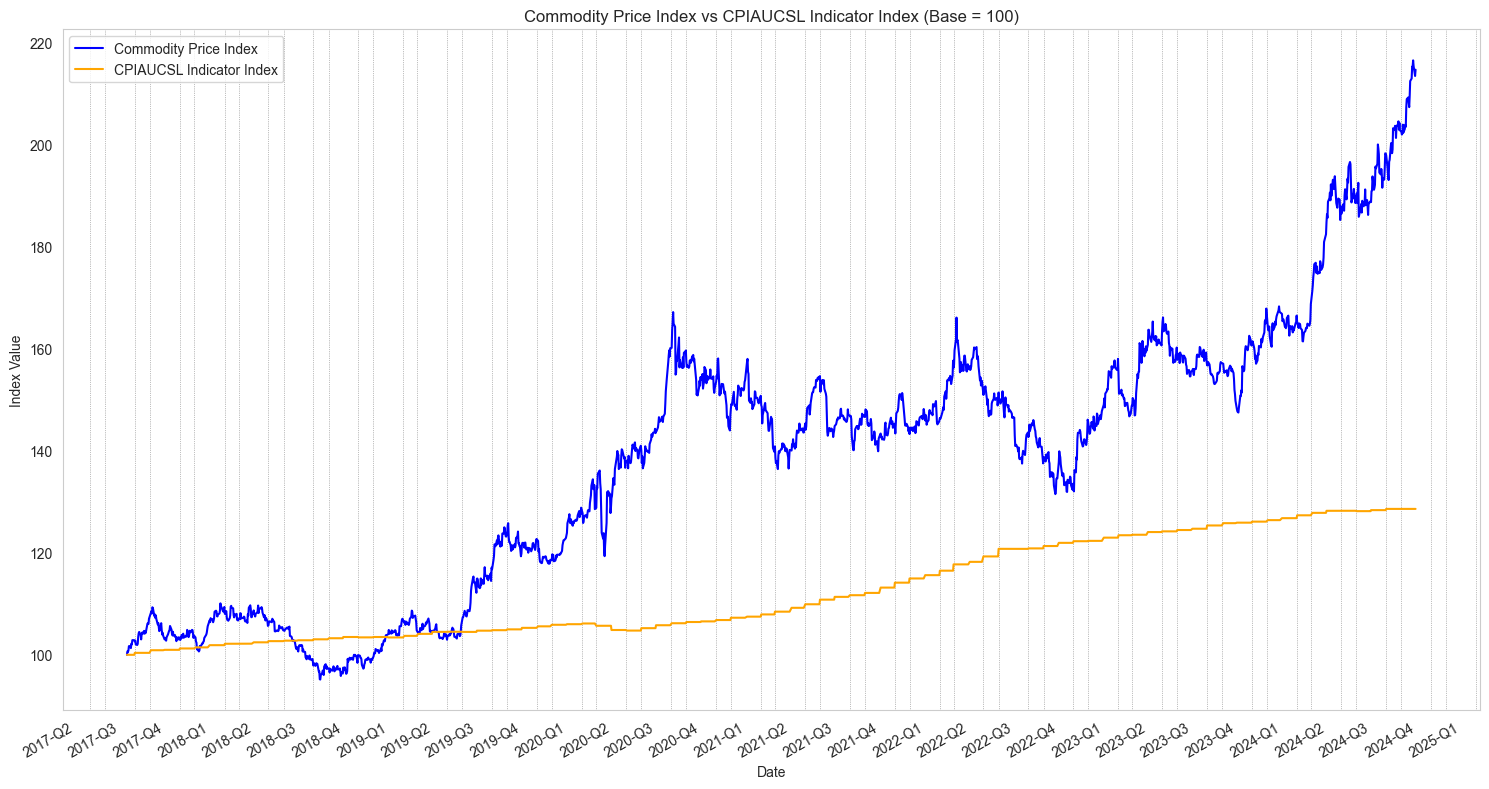

In [20]:
compare_to_economic_indicators(data_gold, 'CPIAUCSL')

### Feature 6 -- Compare the relationship's between commodities and indexes and with the help of this structure you are going to see most correlated indexes with certain commodities, It will only look for the indexes you defined.

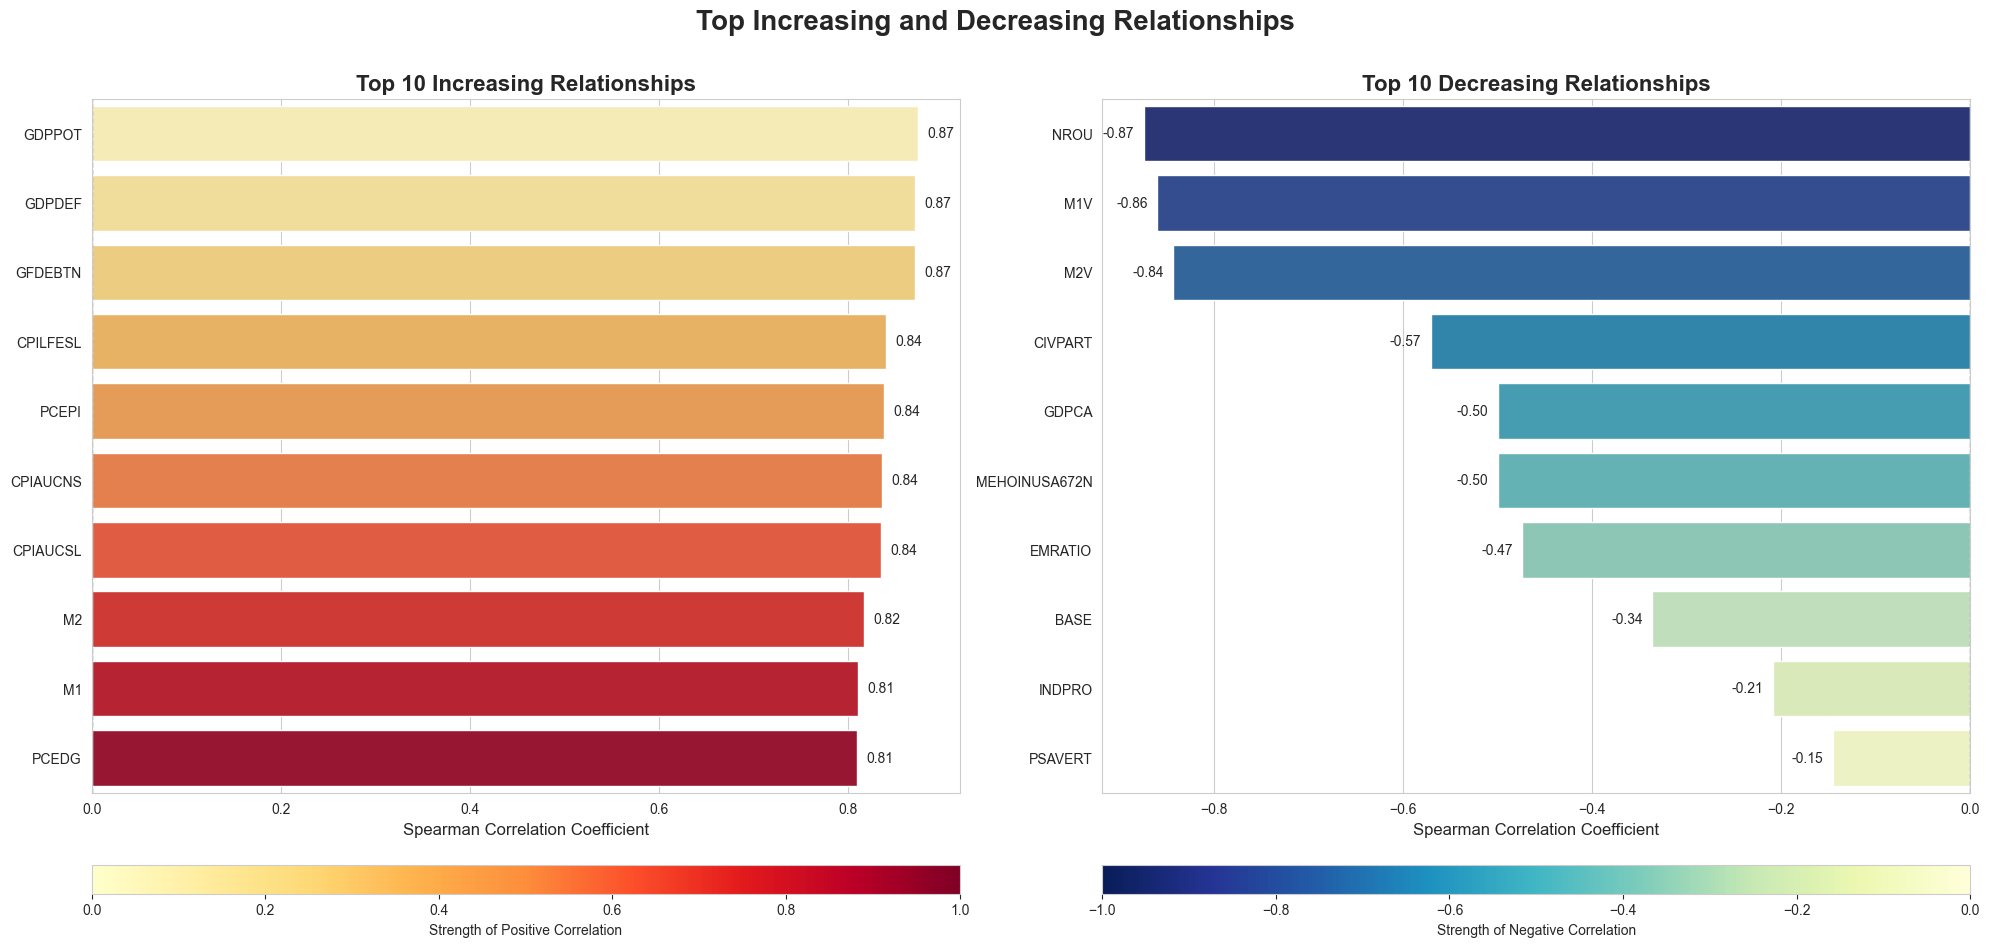

In [21]:
economic_series_ids = [
    # GDP Indicators
    "GDP", "GDPC1", "GDPPOT", "GDPCA",  # GDP related indicators
    # Prices and Inflation Indicators
    "CPIAUCSL", "CPILFESL", "GDPDEF", "PPIACO", "CPIAUCNS",  # Prices and Inflation
    # Money Supply Indicators
    "BASE", "M1", "M2", "M1V", "M2V", "M3",  # Money Supply metrics
    # Interest Rates Indicators
    "DFF", "DTB3", "DGS5", "DGS10", "DGS30", "TEDRATE", "DPRIME", "T10Y2Y",  # Interest Rates
    # Employment Indicators
    "UNRATE", "NROU", "CIVPART", "EMRATIO", "PAYEMS", "ICSA",  # Employment metrics
    # Income and Expenditure Indicators
    "MEHOINUSA672N", "DSPIC96", "PCE", "PCEDG", "PSAVERT", "RRSFS", "DSPI", "PCEPI",  # Income indicators
    # Other Economic Indicators
    "INDPRO", "TCU", "HOUST", "GPDI", "CP", "STLFSI", "DCOILWTICO", "USSLIND", "DTWEXM", "DTWEXB", 
    # Debt Indicators
    "GFDEBTN", "GFDEGDQ188S", "EXCSRESNW",  # Debt-related metrics
    # Stock Market Indicators
"SP500",
"CPIAUCSL"
]
  
top_increasing, top_decreasing = calculate_monotonic_relationships(data_gold, economic_series_ids)
visualize_relationships(top_increasing, top_decreasing)